### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 7: Compile the results

***

## Importe modules

In [1]:
import os
import warnings

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues
sns.set_style("darkgrid")

In [2]:
# Globals
current_path  = os.getcwd()
path_analysis = os.path.join(current_path, "_analysis")

# Check if the folder exists, if not, create it
if not os.path.exists(path_analysis):
    os.makedirs(path_analysis)

# For the picture names
pic_first_name = '07_Compile_results_'

## Loading the results


In [3]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    nom_dataset = 'ESC-10' 
    fold        = '1'
    
    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_models = os.path.join(current_path, "BDLib2_saved_models")
    nom_dataset = 'BDLib2' 
    fold        = 'fold-1'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_models = os.path.join(current_path, "US8K_saved_models")
    nom_dataset = 'US8K' 
    fold        = '1'

    
if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")
    nom_dataset = 'US8K_AV' 
    fold        = '1'


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 2


In [4]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [5]:
files = [f for f in os.listdir(path_models) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]
files

['BDLib2_metrics_set_norm_augmented_no_cm.csv',
 'BDLib2_metrics_set_norm_original_no_cm.csv',
 'BDLib2_metrics_set_norm_PCA_augmented_no_cm.csv',
 'BDLib2_metrics_set_norm_PCA_original_no_cm.csv',
 'BDLib2_metrics_set_norm_PCA_windowed_no_cm.csv',
 'BDLib2_metrics_set_norm_windowed_no_cm.csv',
 'BDLib2_metrics_set_std_augmented_no_cm.csv',
 'BDLib2_metrics_set_std_original_no_cm.csv',
 'BDLib2_metrics_set_std_PCA_augmented_no_cm.csv',
 'BDLib2_metrics_set_std_PCA_original_no_cm.csv',
 'BDLib2_metrics_set_std_PCA_windowed_no_cm.csv',
 'BDLib2_metrics_set_std_windowed_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_augmented_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_original_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_PCA_augmented_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_PCA_original_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_PCA_windowed_no_cm.csv',
 'BDLib2_NN_metrics_set_norm_windowed_no_cm.csv',
 'BDLib2_NN_metrics_set_std_augmented_no_cm.csv',
 'BDLib2_NN_metrics_set_std_original_no_cm.csv',
 

In [6]:
files[0]

'BDLib2_metrics_set_norm_augmented_no_cm.csv'

In [7]:
batch_type = files[0].split(f'{nom_dataset}_metrics_set_')[1].split('_no_cm.csv')[0]
batch_type

'norm_augmented'

In [8]:
db = pd.read_csv(os.path.join(path_models, files[0]), sep='\t')
db = db.drop('Unnamed: 0', axis=1)
db.insert(0, 'batch_type', batch_type)
db

,batch_type,index,Model,Fold,...,Precision(Validation),Recall(Train),Recall(Validation),Process_time
0,norm_augmented,16,Forest,fold-3,...,0.793354,1.000000,0.761111,109.375
1,norm_augmented,4,Forest,fold-1,...,0.842514,1.000000,0.830556,140.625
2,norm_augmented,10,Forest,fold-2,...,0.858418,1.000000,0.838889,62.500
3,norm_augmented,0,GaussianNB,fold-1,...,0.624640,0.801389,0.611111,0.000
4,norm_augmented,12,GaussianNB,fold-3,...,0.722406,0.819444,0.669444,15.625
5,norm_augmented,6,GaussianNB,fold-2,...,0.732070,0.802778,0.713889,0.000
6,norm_augmented,3,KNN,fold-1,...,0.683212,0.981944,0.638889,281.250
7,norm_augmented,9,KNN,fold-2,...,0.747091,0.983333,0.705556,390.625
8,norm_augmented,15,KNN,fold-3,...,0.782199,0.979167,0.733333,281.250
9,norm_augmented,2,LogisticR,fold-1,...,0.778317,0.962500,0.741667,0.000


In [9]:
db.dtypes

batch_type                object
index                      int64
Model                     object
Fold                      object
Accuracy(Train)          float64
Accuracy(Validation)     float64
F1(Train)                float64
F1(Validation)           float64
Precision(Train)         float64
Precision(Validation)    float64
Recall(Train)            float64
Recall(Validation)       float64
Process_time             float64
dtype: object

In [10]:
db = db.drop(['Fold', 'index'], axis=1)

new_db = db.groupby(['Model', 'batch_type']).agg(['mean', 'std'])

In [11]:
new_db

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time            
                                     mean       std                 mean       std  ...               mean       std         mean         std
Model      batch_type                                                               ...                                                      
Forest     norm_augmented        1.000000  0.000000             0.810185  0.042703  ...           0.810185  0.042703   104.166667   39.322054
GaussianNB norm_augmented        0.807870  0.010047             0.664815  0.051545  ...           0.664815  0.051545     5.208333    9.021098
KNN        norm_augmented        0.981481  0.002122             0.692593  0.048538  ...           0.692593  0.048538   317.708333   63.147686
LogisticR  norm_augmented        0.971296  0.008372             0.780556  0.033793  ...           0.780556  0.033793     0.000000    0.000000
SVC        norm_augmented        0.985648  0.004465             0.774074  0.008929  ...           0.774074  0.008929    20.833333    9.021098
Voting     norm_augmented        0.985185  0.003208             0.766667  0.032750  ...           0.766667  0.032750   989.583333  117.274273

[6 rows x 18 columns]

In [12]:
def compile_results(path: str):
    
    files = [f for f in os.listdir(path) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]

    db_list = []
    extracted_parts = []
    total_samples = 0
    
    for file in files:
        print(file)
        db = pd.read_csv(os.path.join(path_models, file), sep='\t')
        db = db.drop('Unnamed: 0', axis=1)
        samples = int(len(db))
        print(f'Samples: {samples}')
        total_samples = total_samples + samples
        
        cols_to_rename = {'Accuracy(Val)': 'Accuracy(Validation)', 'F1(Val)': 'F1(Validation)',
                          'Precision(Val)': 'Precision(Validation)', 'Recall(Val)': 'Recall(Validation)'}
        db.rename(columns=cols_to_rename, inplace=True)

        db_list.append(db) 
    
        if "_metrics_set_" in file:
            parts = file.split("_metrics_set_")[1].split("_")
        elif "_NN_metrics_set_" in file:
            parts = file.split("_NN_metrics_set_")[1].split("_")

        extracted_part = "_".join(parts[:-2])
        extracted_parts.append(extracted_part)
        print(extracted_part)
        
        db.insert(0, 'batch_type', extracted_part)
        print("===================================================================")
    print(len(extracted_parts))
    print(total_samples)
    print(len(db_list))
    return pd.concat(db_list, ignore_index=True)  

In [13]:
DB = compile_results(path_models)
DB

BDLib2_metrics_set_norm_augmented_no_cm.csv
Samples: 18
norm_augmented
BDLib2_metrics_set_norm_original_no_cm.csv
Samples: 18
norm_original
BDLib2_metrics_set_norm_PCA_augmented_no_cm.csv
Samples: 18
norm_PCA_augmented
BDLib2_metrics_set_norm_PCA_original_no_cm.csv
Samples: 18
norm_PCA_original
BDLib2_metrics_set_norm_PCA_windowed_no_cm.csv
Samples: 18
norm_PCA_windowed
BDLib2_metrics_set_norm_windowed_no_cm.csv
Samples: 18
norm_windowed
BDLib2_metrics_set_std_augmented_no_cm.csv
Samples: 18
std_augmented
BDLib2_metrics_set_std_original_no_cm.csv
Samples: 18
std_original
BDLib2_metrics_set_std_PCA_augmented_no_cm.csv
Samples: 18
std_PCA_augmented
BDLib2_metrics_set_std_PCA_original_no_cm.csv
Samples: 18
std_PCA_original
BDLib2_metrics_set_std_PCA_windowed_no_cm.csv
Samples: 18
std_PCA_windowed
BDLib2_metrics_set_std_windowed_no_cm.csv
Samples: 18
std_windowed
BDLib2_NN_metrics_set_norm_augmented_no_cm.csv
Samples: 6
norm_augmented
BDLib2_NN_metrics_set_norm_original_no_cm.csv
Samples: 

,batch_type,index,Model,Fold,...,Precision(Validation),Recall(Train),Recall(Validation),Process_time
0,norm_augmented,16,Forest,fold-3,...,0.793354,1.000000,0.761111,109.375
1,norm_augmented,4,Forest,fold-1,...,0.842514,1.000000,0.830556,140.625
2,norm_augmented,10,Forest,fold-2,...,0.858418,1.000000,0.838889,62.500
3,norm_augmented,0,GaussianNB,fold-1,...,0.624640,0.801389,0.611111,0.000
4,norm_augmented,12,GaussianNB,fold-3,...,0.722406,0.819444,0.669444,15.625
...,...,...,...,...,...,...,...,...,...
283,std_windowed,4,ANN,fold-3,...,0.776503,1.000000,0.753216,234.375
284,std_windowed,2,ANN,fold-2,...,0.782996,1.000000,0.778947,218.750
285,std_windowed,5,CNN_1D,fold-3,...,0.745226,1.000000,0.715789,1500.000
286,std_windowed,1,CNN_1D,fold-1,...,0.772634,1.000000,0.750146,921.875


In [14]:
sort_order = ['norm_original', 'norm_PCA_original', 'norm_augmented', 'norm_PCA_augmented', 
              'norm_windowed', 'norm_PCA_windowed', 'std_original', 'std_PCA_original', 
              'std_augmented', 'std_PCA_augmented', 'std_windowed', 'std_PCA_windowed']

DB['batch_type'] = pd.Categorical(DB['batch_type'], categories=sort_order, ordered=True)

DB     = DB.drop(['Fold', 'index'], axis=1)
new_DB = DB.groupby(['Model', 'batch_type']).agg(['mean', 'std']).sort_values('batch_type')

In [15]:
new_DB

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time            
                                      mean       std                 mean       std  ...               mean       std         mean         std
Model     batch_type                                                                 ...                                                      
ANN       norm_original           0.904321  0.066983             0.677778  0.110972  ...           0.677778  0.110972    26.041667    9.021098
Forest    norm_original           1.000000  0.000000             0.794444  0.025459  ...           0.794444  0.025459    98.958333    9.021098
KNN       norm_original           0.819444  0.026788             0.638889  0.058531  ...           0.638889  0.058531   328.125000  230.170623
LogisticR norm_original           0.975000  0.014434             0.744444  0.025459  ...           0.744444  0.025459     0.000000    0.000000
CNN_1D    norm_original           0.956790  0.014144             0.694444  0.041944  ...           0.694444  0.041944    20.833333    9.021098
...                                    ...       ...                  ...       ...  ...                ...       ...          ...         ...
Forest    std_PCA_windowed        1.000000  0.000000             0.709990  0.021167  ...           0.709990  0.021167  1734.375000   68.107796
CNN_1D    std_PCA_windowed        1.000000  0.000000             0.725000  0.019706  ...           0.725000  0.019706   203.125000   15.625000
ANN       std_PCA_windowed        1.000000  0.000000             0.751511  0.009419  ...           0.751511  0.009419   135.416667   32.526031
SVC       std_PCA_windowed        0.992593  0.003607             0.733480  0.021004  ...           0.733480  0.021004  1395.833333  239.186719
Voting    std_PCA_windowed        0.990936  0.003832             0.741374  0.017816  ...           0.741374  0.017816  4968.750000  235.932326

[96 rows x 18 columns]

In [16]:
new_DB_reset = new_DB.reset_index()

top_accuracies = new_DB_reset[('Accuracy(Validation)', 'mean')].groupby(new_DB_reset['Model']).nlargest(1).reset_index()

merged = pd.merge(top_accuracies, new_DB_reset, on=['Model', ('Accuracy(Validation)', 'mean')], how='left')

result = merged[[('Model',     ''), ('batch_type',     ''), ('Accuracy(Validation)', 'mean'), ('Accuracy(Validation)', 'std')]]

result_sorted = result.sort_values(by=[('Accuracy(Validation)', 'mean')], ascending=False)

In [17]:
# Highest averaged accuracy per model

result_sorted.style.background_gradient(cmap = cmap_cm)

In [18]:
model = 'ANN'
data = new_DB.loc[model]
data

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time           
                              mean       std                 mean       std  ...               mean       std         mean        std
batch_type                                                                   ...                                                     
norm_original             0.904321  0.066983             0.677778  0.110972  ...           0.677778  0.110972    26.041667   9.021098
norm_PCA_original         0.891975  0.086033             0.600000  0.101379  ...           0.600000  0.101379    15.625000   0.000000
norm_augmented            0.988683  0.006237             0.780556  0.030932  ...           0.780556  0.030932    31.250000   0.000000
norm_PCA_augmented        0.994342  0.009801             0.760185  0.037918  ...           0.760185  0.037918    26.041667   9.021098
norm_windowed             1.000000  0.000000             0.753460  0.049843  ...           0.753460  0.049843   166.666667  39.322054
norm_PCA_windowed         1.000000  0.000000             0.761355  0.018157  ...           0.761355  0.018157   151.041667  39.322054
std_original              0.987654  0.005346             0.677778  0.075154  ...           0.677778  0.075154    20.833333   9.021098
std_PCA_original          0.990741  0.016038             0.694444  0.034694  ...           0.694444  0.034694    26.041667   9.021098
std_augmented             1.000000  0.000000             0.797222  0.011111  ...           0.797222  0.011111    31.250000   0.000000
std_PCA_augmented         0.992284  0.010802             0.762037  0.020475  ...           0.762037  0.020475    36.458333   9.021098
std_windowed              1.000000  0.000000             0.757895  0.019147  ...           0.757895  0.019147   203.125000  41.339864
std_PCA_windowed          1.000000  0.000000             0.751511  0.009419  ...           0.751511  0.009419   135.416667  32.526031

[12 rows x 18 columns]

In [19]:
data = new_DB.loc['ANN'].reset_index()
data

batch_type Accuracy(Train)           Accuracy(Validation)  ... Recall(Validation)           Process_time           
                                  mean       std                 mean  ...               mean       std         mean        std
0        norm_original        0.904321  0.066983             0.677778  ...           0.677778  0.110972    26.041667   9.021098
1    norm_PCA_original        0.891975  0.086033             0.600000  ...           0.600000  0.101379    15.625000   0.000000
2       norm_augmented        0.988683  0.006237             0.780556  ...           0.780556  0.030932    31.250000   0.000000
3   norm_PCA_augmented        0.994342  0.009801             0.760185  ...           0.760185  0.037918    26.041667   9.021098
4        norm_windowed        1.000000  0.000000             0.753460  ...           0.753460  0.049843   166.666667  39.322054
5    norm_PCA_windowed        1.000000  0.000000             0.761355  ...           0.761355  0.018157   151.041667  39.322054
6         std_original        0.987654  0.005346             0.677778  ...           0.677778  0.075154    20.833333   9.021098
7     std_PCA_original        0.990741  0.016038             0.694444  ...           0.694444  0.034694    26.041667   9.021098
8        std_augmented        1.000000  0.000000             0.797222  ...           0.797222  0.011111    31.250000   0.000000
9    std_PCA_augmented        0.992284  0.010802             0.762037  ...           0.762037  0.020475    36.458333   9.021098
10        std_windowed        1.000000  0.000000             0.757895  ...           0.757895  0.019147   203.125000  41.339864
11    std_PCA_windowed        1.000000  0.000000             0.751511  ...           0.751511  0.009419   135.416667  32.526031

[12 rows x 19 columns]

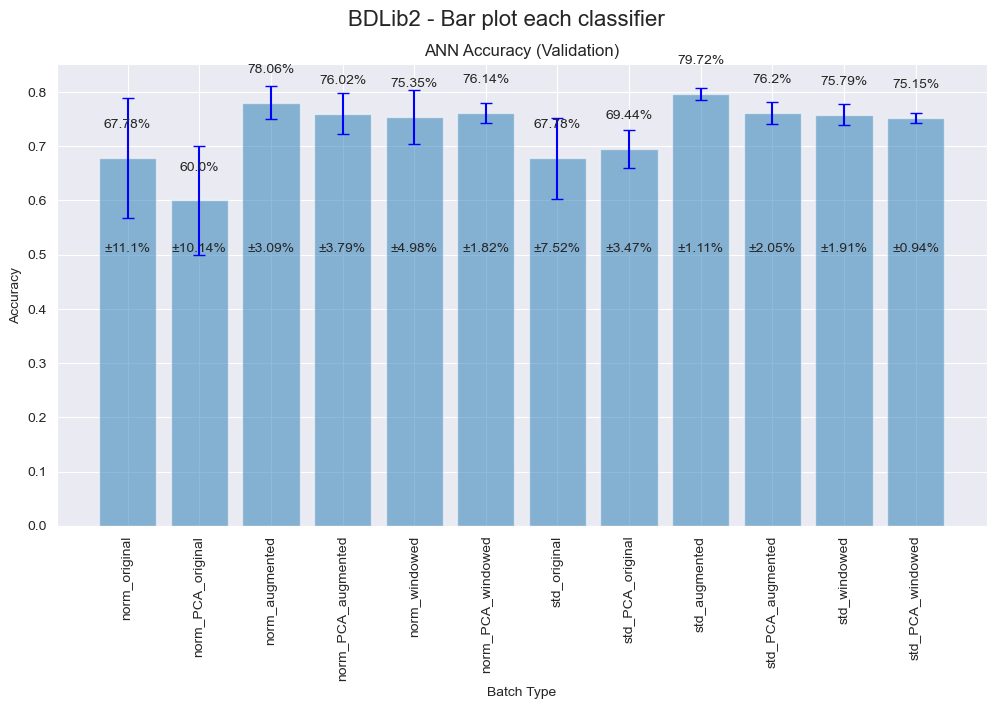

In [20]:
# Reset index for easier plotting
data = new_DB.loc['ANN'].reset_index()

plt.figure(figsize=(12,6))
plt.suptitle(f'{nom_dataset} - Bar plot each classifier', fontsize = 16,  y=0.97)

# Create a bar plot of mean accuracy with error bars representing standard deviation
plt.bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
        yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
        alpha=0.5, ecolor='blue')

# Add title and labels
plt.title(f'{model} Accuracy (Validation)')
plt.xlabel('Batch Type')
plt.ylabel('Accuracy')

min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

# Add accuracy values on the plot
for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
    plt.text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')
    
for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
    plt.text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


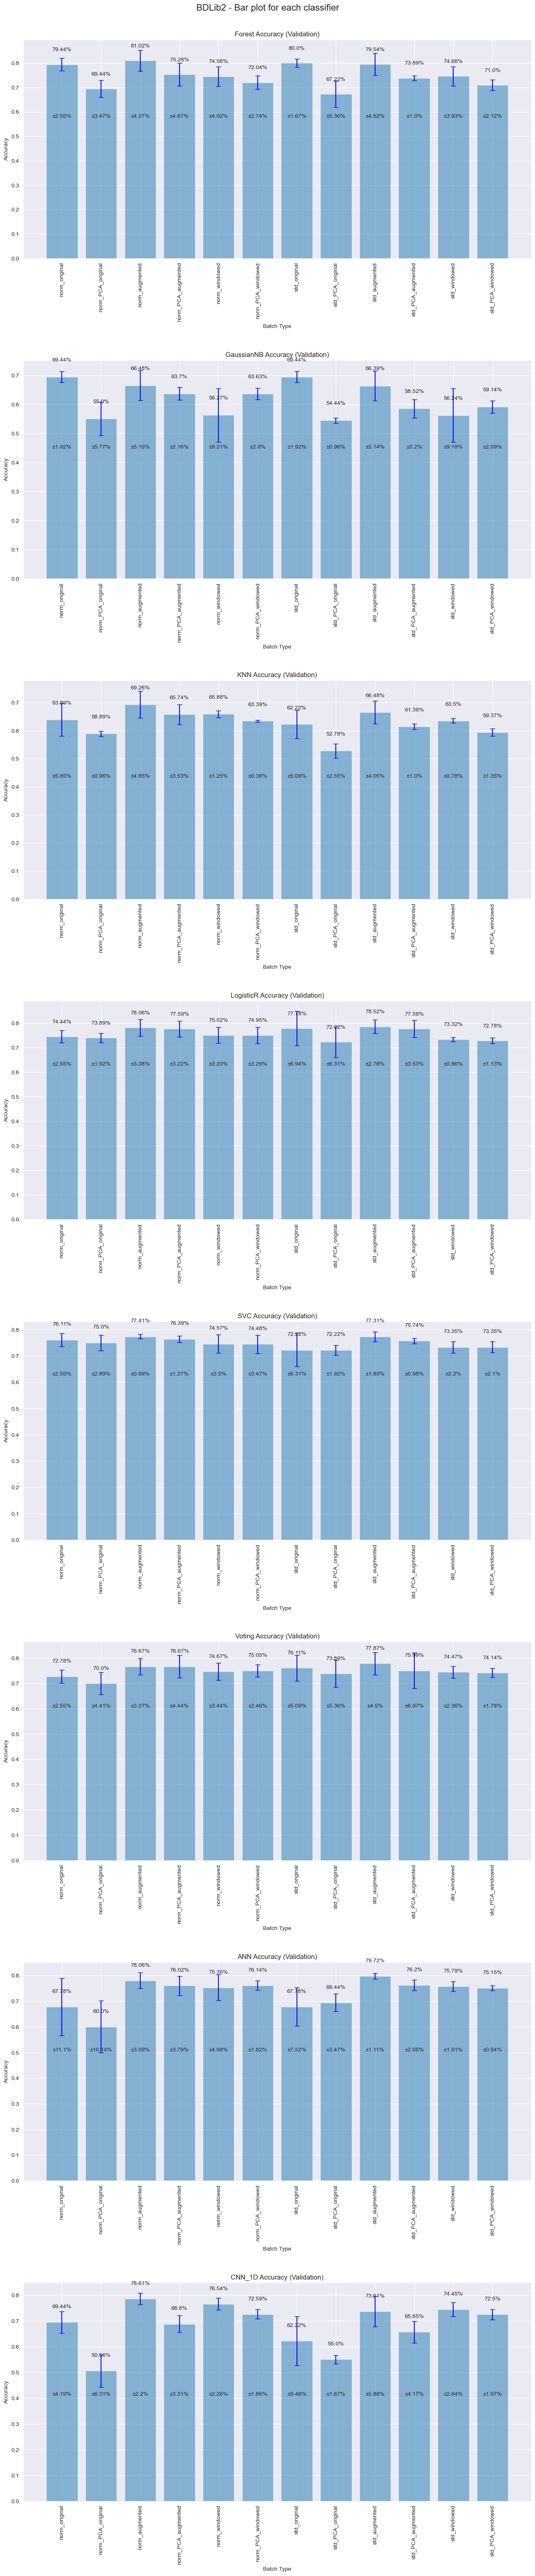

In [21]:
models = DB['Model'].unique()

n_rows = len(models)

fig, axs = plt.subplots(n_rows, 1, figsize=(14,8*n_rows))
plt.suptitle(f'{nom_dataset} - Bar plot for each classifier', fontsize = 16,  y=0.99)

for idx, model in enumerate(models):
    data = new_DB.loc[model].reset_index()

    axs[idx].bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
                 yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
                 alpha=0.5, ecolor='blue')

    axs[idx].set_title(f'{model} Accuracy (Validation)')
    axs[idx].set_xlabel('Batch Type')
    axs[idx].set_ylabel('Accuracy')

    min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
        axs[idx].text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
        axs[idx].text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

    axs[idx].set_xticks(data.index)
    axs[idx].set_xticklabels(data['batch_type'], rotation=90)

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

In [22]:
for batch in np.unique(DB['batch_type']):
    print(batch)
    DB[DB['batch_type'] == batch]

norm_PCA_augmented
norm_PCA_original
norm_PCA_windowed
norm_augmented
norm_original
norm_windowed
std_PCA_augmented
std_PCA_original
std_PCA_windowed
std_augmented
std_original
std_windowed


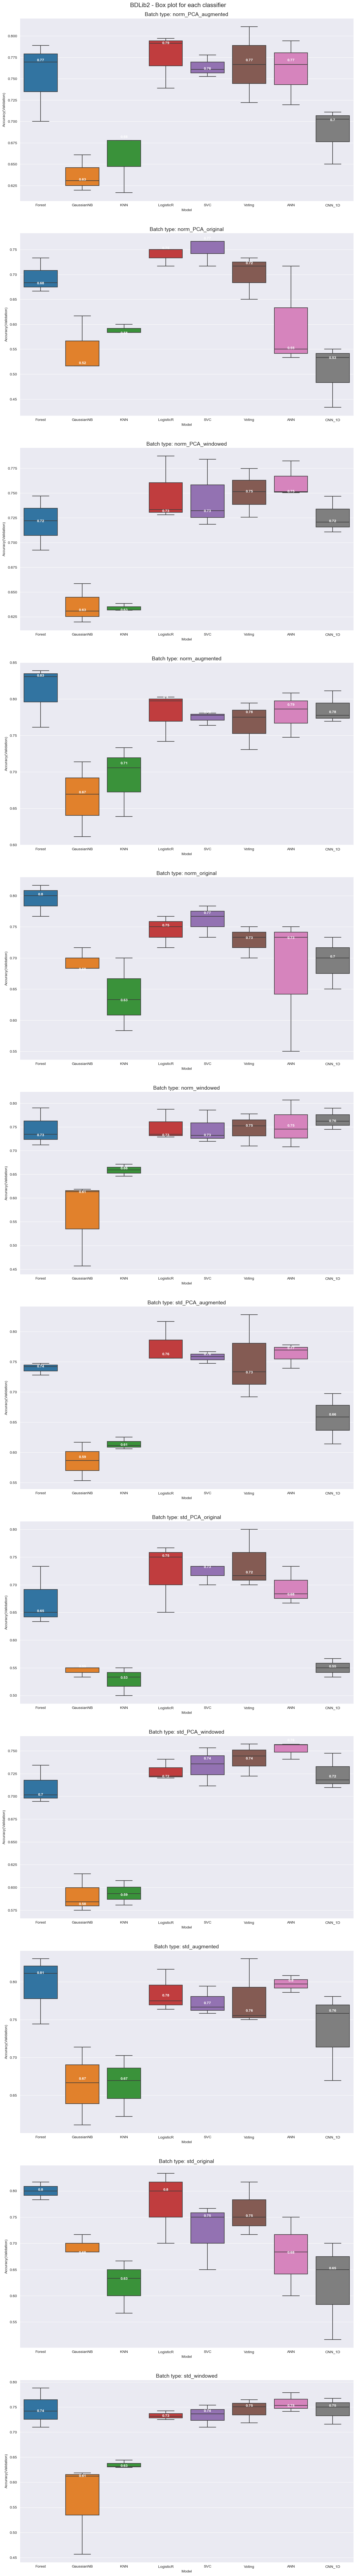

In [23]:
n_batches = len(np.unique(DB['batch_type']))
fig, axs = plt.subplots(n_batches, figsize=(14,8*n_batches))
plt.suptitle(f'{nom_dataset} - Box plot for each classifier', fontsize = 16, y=0.99)

for i, batch in enumerate(np.unique(DB['batch_type'])):
    dbPlot = DB[DB['batch_type'] == batch]
    
    axs[i].set_title(f'Batch type: {batch}', fontsize = 14)
    box_plot = sns.boxplot(data=dbPlot, x="Model", y="Accuracy(Validation)", showfliers = True, ax=axs[i])

    medians = list(dbPlot.groupby(['Model'], sort=False)['Accuracy(Validation)'].median())
    medians = [round(element, 2) for element in medians]

    vertical_offset = dbPlot['Accuracy(Validation)'].median()*0.001  # offset from median for display

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
                horizontalalignment='center',size='medium',color='w',weight='semibold')

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

# End of the notebook

# 

# 

# 